# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
#create list

city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [23]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# for loop and add to lists
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("N/A")

Processing Record 1 of Set 1 : faanui
Processing Record 2 of Set 1 : rikitea
Processing Record 3 of Set 1 : kudal
Processing Record 4 of Set 1 : nome
Processing Record 5 of Set 1 : barrow
Processing Record 6 of Set 1 : torbay
Processing Record 7 of Set 1 : kapaa
Processing Record 8 of Set 1 : kodiak
Processing Record 9 of Set 1 : tilichiki
Processing Record 10 of Set 1 : nanortalik
Processing Record 11 of Set 1 : luoyang
Processing Record 12 of Set 1 : dunedin
N/A
Processing Record 13 of Set 1 : punta arenas
Processing Record 14 of Set 1 : prince rupert
N/A
Processing Record 15 of Set 1 : bautzen
Processing Record 16 of Set 1 : cabo san lucas
Processing Record 17 of Set 1 : berlevag
N/A
N/A
N/A
Processing Record 18 of Set 1 : busselton
Processing Record 19 of Set 1 : lorengau
Processing Record 20 of Set 1 : gigmoto
Processing Record 21 of Set 1 : hobart
Processing Record 22 of Set 1 : amatitan
Processing Record 23 of Set 1 : lonar
Processing Record 24 of Set 1 : cape town
Processing Re

Processing Record 46 of Set 4 : perdoes
Processing Record 47 of Set 4 : tyristrand
Processing Record 48 of Set 4 : binucayan
Processing Record 49 of Set 4 : luanda
Processing Record 50 of Set 4 : wattegama
Processing Record 0 of Set 5 : bereda
Processing Record 1 of Set 5 : adrar
Processing Record 2 of Set 5 : mbumi
Processing Record 3 of Set 5 : itoman
Processing Record 4 of Set 5 : marzuq
Processing Record 5 of Set 5 : gusau
Processing Record 6 of Set 5 : carnarvon
Processing Record 7 of Set 5 : ilulissat
N/A
Processing Record 8 of Set 5 : altay
Processing Record 9 of Set 5 : constitucion
Processing Record 10 of Set 5 : xuddur
Processing Record 11 of Set 5 : irmo
Processing Record 12 of Set 5 : meulaboh
Processing Record 13 of Set 5 : provideniya
N/A
Processing Record 14 of Set 5 : yeppoon
Processing Record 15 of Set 5 : khilok
Processing Record 16 of Set 5 : sitka
Processing Record 17 of Set 5 : batemans bay
Processing Record 18 of Set 5 : qaanaaq
Processing Record 19 of Set 5 : nec

Processing Record 41 of Set 8 : porto santo
Processing Record 42 of Set 8 : blagoyevo
Processing Record 43 of Set 8 : korla
Processing Record 44 of Set 8 : chegdomyn
Processing Record 45 of Set 8 : saint-georges
Processing Record 46 of Set 8 : lewisporte
Processing Record 47 of Set 8 : praia
Processing Record 48 of Set 8 : olinda
Processing Record 49 of Set 8 : harrismith
Processing Record 50 of Set 8 : saint-hyacinthe
Processing Record 0 of Set 9 : yamada
Processing Record 1 of Set 9 : athabasca
Processing Record 2 of Set 9 : owerri
Processing Record 3 of Set 9 : morehead
Processing Record 4 of Set 9 : brumado
Processing Record 5 of Set 9 : ancud
Processing Record 6 of Set 9 : guerrero negro
Processing Record 7 of Set 9 : kieta
Processing Record 8 of Set 9 : gornopravdinsk
Processing Record 9 of Set 9 : vestmanna
N/A
Processing Record 10 of Set 9 : shimoda
Processing Record 11 of Set 9 : pineville
Processing Record 12 of Set 9 : flinders
Processing Record 13 of Set 9 : nabire
N/A
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# make new data frame
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [30]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Faanui,100,PF,1622434326,72,-16.4833,-151.7500,79.27,16.62
1,Rikitea,56,PF,1622434327,69,-23.1203,-134.9692,75.07,11.54
2,Kudāl,86,IN,1622434327,72,16.0333,73.6833,84.72,7.02
3,Nome,1,US,1622434327,50,64.5011,-165.4064,57.16,9.22
4,Barrow,90,US,1622434203,80,71.2906,-156.7887,30.22,12.66
...,...,...,...,...,...,...,...,...,...
538,Filimonovo,32,RU,1622434267,55,56.2011,95.4611,50.00,4.61
539,Severnyy,90,RU,1622434491,93,50.6770,36.5532,50.04,6.71
540,Uvalde,1,US,1622434491,68,29.3669,-99.7670,74.35,15.10
541,Deputatsky,8,RU,1622434492,36,69.3000,139.9000,62.19,17.47


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
test = weather_dict.loc[(weather_dict["Humidity"] >= 100)].dropna()


In [32]:
#  Get the indices of cities that have humidity over 100%.
test

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
76,Caraballeda,37,VE,1622434350,100,10.6112,-66.8522,78.87,7.38
203,Bereda,26,ES,1622434387,100,43.2686,-7.5406,55.15,2.37
372,Woodward,90,US,1622434440,100,36.4337,-99.3904,65.43,15.48
416,Vestmanna,90,FO,1622434453,100,62.1564,-7.1664,49.12,15.30
428,Dudinka,100,RU,1622434458,100,69.4058,86.1778,33.57,9.55
532,Lompoc,90,US,1622434238,100,34.6391,-120.4579,64.11,5.57


In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

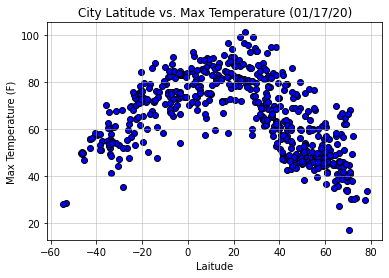

In [48]:
#Latitude vs. Temperature Plot 
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "blue", edgecolor = "black")

#title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

#x axis 
plt.xlabel("Laitude")

#y axis 
plt.ylabel("Max Temperature (F)")


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

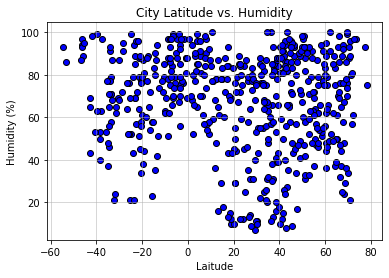

In [49]:
#Latitude vs. Humidity Plot 
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "blue", edgecolor = "black")

#title
plt.title("City Latitude vs. Humidity")

#x axis 
plt.xlabel("Laitude")

#y axis 
plt.ylabel("Humidity (%)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

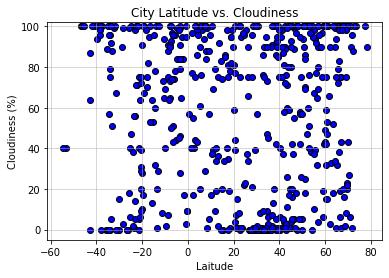

In [52]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "blue", edgecolor = "black")

#title
plt.title("City Latitude vs. Cloudiness")

#x axis
plt.xlabel("Laitude")

#y axis 
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,102)


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

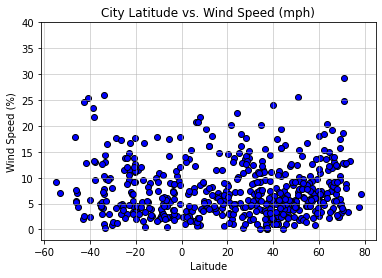

In [54]:
#Latitude vs. Wind Speed
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")

#x axis
plt.xlabel("Laitude")

#y axis
plt.ylabel("Wind Speed (%)")

#y axis
plt.ylim(-2,40)


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [71]:
#north and south hemi data frame
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [72]:
#function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

#fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.77


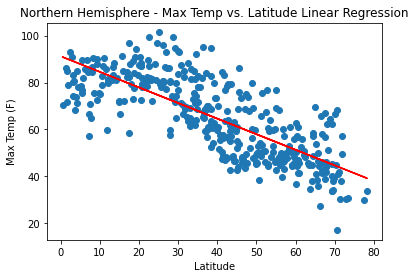

In [75]:
#functions
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

annotate(equation, 0, 0)

#title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

#xlabel
plt.xlabel("Latitude")

#ylabel
plt.ylabel("Max Temp (F)")

#save
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.76


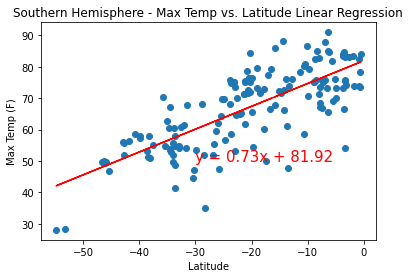

In [78]:
#functions
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

annotate(equation, -30, 50)

#title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

#xlabel
plt.xlabel("Latitude")

#ylabel
plt.ylabel("Max Temp (F)")

#save
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.02


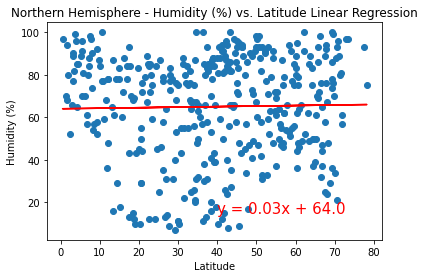

In [79]:
#functions
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

annotate(equation, 40, 15)

#title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#xlabel
plt.xlabel("Latitude")

#ylabel
plt.ylabel("Humidity (%)")

#save
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.16


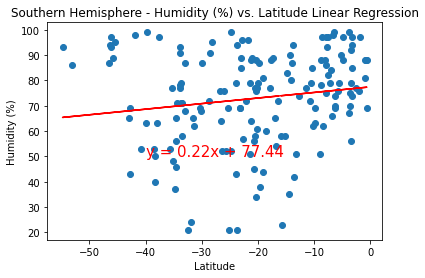

In [77]:
#functions
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

annotate(equation, -40, 50)

#title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#xlabel
plt.xlabel("Latitude")

#ylabel
plt.ylabel("Humidity (%)")

#save
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.09


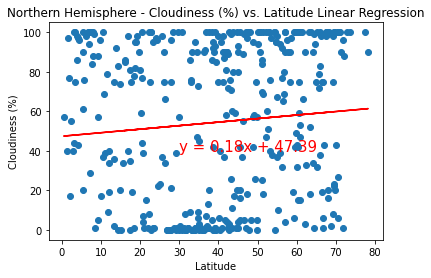

In [80]:
#funstions
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

annotate(equation, 30, 40)

#title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#xlabel
plt.xlabel("Latitude")

#ylabel
plt.ylabel("Cloudiness (%)")

#save
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.0


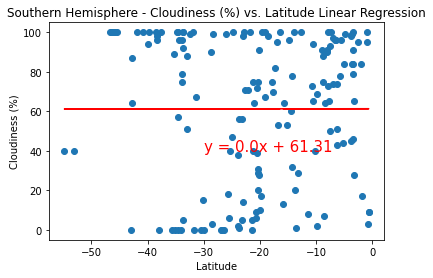

In [81]:
#functions
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

annotate(equation, -30, 40)

#title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#xlabel
plt.xlabel("Latitude")

#ylabel
plt.ylabel("Cloudiness (%)")

#save
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.1


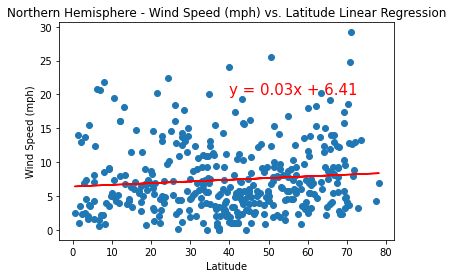

In [82]:
#functions
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

annotate(equation, 40, 20)

#title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#xlabel
plt.xlabel("Latitude")

#ylabel
plt.ylabel("Wind Speed (mph)")

#save
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.21


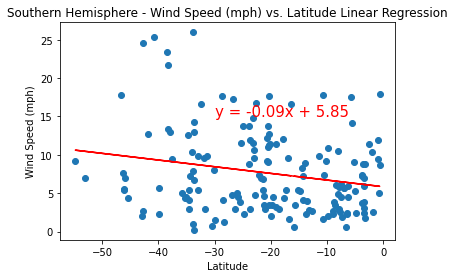

In [83]:
#functions
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

annotate(equation, -30, 15)

#title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#xlabel
plt.xlabel("Latitude")

#ylabel
plt.ylabel("Wind Speed (mph)")

#save
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")